# Lucas-Kanade Tracking

- Create a command-line tool (interactive notebook instead) that accepts the ROI of the target (the portion of the image should be tracked in the video) and the path to the dataset and performs tracking of the target over the image sequence from the dataset. 

- Visualize the current image and highligh the targets location by a rectangle.

- Find conditions where tracking is lost and explain why.

## Problems

- Implement template-matching in Python using SSD, NCC, SAD
- Code Lucas-Kanade algorithm in Python using OpenCV
- Implement pyramidal extension to Lucas-Kanade algorithm
- Test on the 3 datasets 

*Datasets:* http://cvlab.hanyang.ac.kr/tracker_benchmark/datasets.html

In [1]:
import sys
import cv2

sys.path.insert(0, '../helpers/')

In [2]:
from template_matching import * 
from lucas_kanade_search import LucasKanadeSearcher

In [3]:
%matplotlib inline

In [4]:
work_dir = os.getcwd()
data_dir = os.path.join(work_dir, 'data')
lucas_kanade_data_dir = os.path.join(data_dir, 'lucas_kanade')

# Test images only to compare perfomance of handwritten methods to OpenCV 
messi_full_img = os.path.join(lucas_kanade_data_dir, 'messi_full.jpg')
messi_face_img = os.path.join(lucas_kanade_data_dir, 'messi_face.jpg')

## Problem 1. Implement template-matching using SSD, NCC, SAD

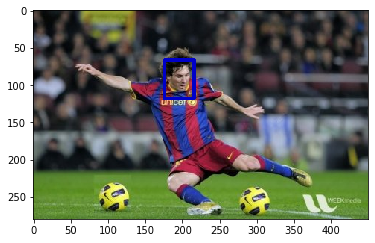

In [7]:
perform_template_matching(messi_full_img, messi_face_img)

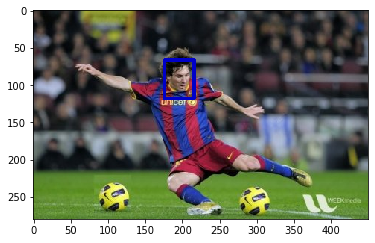

In [8]:
perform_template_matching(messi_full_img, messi_face_img, method = 'ncc')

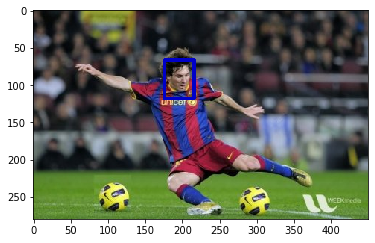

In [9]:
perform_template_matching(messi_full_img, messi_face_img, method = 'sad')

## Problem 2. Implement Lucas-Kanade algorithm using OpenCV 

The algorithm is implemented in the separate script in *helpers/lucas_kanade_tracking.py*. 

To run in just run *python lucas_kanade_tracking.py*. This will open your webcam and you can select the desired point of object to track. 

If you want to pass videofile to track object use *python lucas_kanade_tracking.py video_file_name*. It is important for videofile to be in the same directory or otherwise provide path to the videofile.

## Problem 3. Improve Lucas-Kanade algorithm with pyramidal extensions

The algorithm is implemented in the separate script in *helpers/lucas_kanade_pyramidal_tracking.py*. 

To run in just run *python lucas_kanade_pyramidal_tracking.py*. This will open your webcam and you can select the desired point of object to track. 

If you want to pass videofile to track object use *python lucas_kanade_pyramidal_tracking.py video_file_name*. It is important for videofile to be in the same directory or otherwise provide path to the videofile.